In [1]:
pacman::p_load("MASS", "epiDisplay", 'tidyverse')

In [4]:
glimpse(warpbreaks)

Rows: 54
Columns: 3
$ breaks  <dbl> 26, 30, 54, 25, 70, 52, 51, 26, 67, 18, 21, 29, 17, 12, 18,...
$ wool    <fct> A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A, A,...
$ tension <fct> L, L, L, L, L, L, L, L, L, M, M, M, M, M, M, M, M, M, H, H,...


In [5]:
head(warpbreaks)

,breaks,wool,tension
,<dbl>,<fct>,<fct>
1,26,A,L
2,30,A,L
3,54,A,L
4,25,A,L
5,70,A,L
6,52,A,L


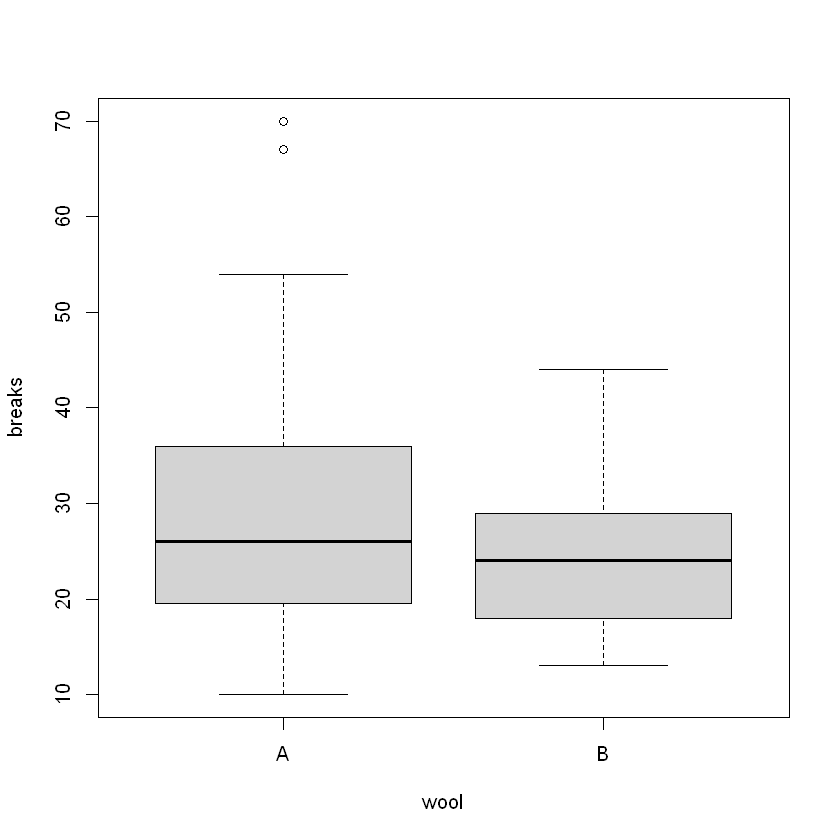

In [6]:
boxplot(breaks ~ wool, data=warpbreaks)

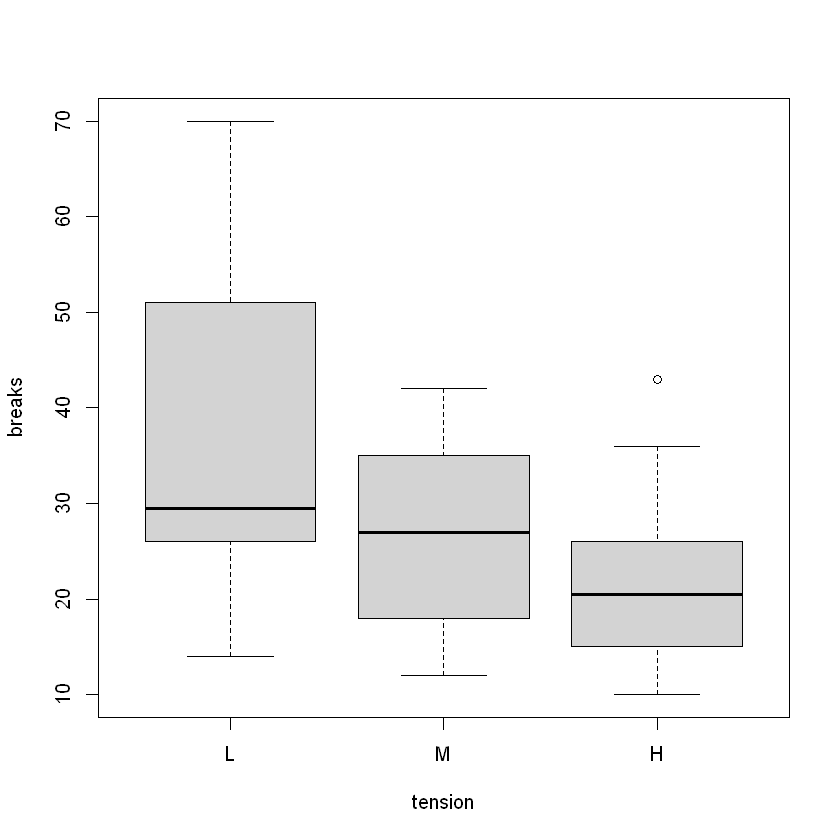

In [7]:
boxplot(breaks ~ tension, data=warpbreaks)

In [20]:
t.test(breaks~wool, data=warpbreaks)


	Welch Two Sample t-test

data:  breaks by wool
t = 1.6335, df = 42.006, p-value = 0.1098
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.360096 12.915652
sample estimates:
mean in group A mean in group B 
       31.03704        25.25926 


In [26]:
a <- warpbreaks %>% filter(wool=='A')
b <- warpbreaks %>% filter(wool=='B')
t.test(a$breaks, b$breaks)


	Welch Two Sample t-test

data:  a$breaks and b$breaks
t = 1.6335, df = 42.006, p-value = 0.1098
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.360096 12.915652
sample estimates:
mean of x mean of y 
 31.03704  25.25926 


In [27]:
oneway.test(breaks ~ tension, data=warpbreaks)


	One-way analysis of means (not assuming equal variances)

data:  breaks and tension
F = 5.8018, num df = 2.00, denom df = 32.32, p-value = 0.007032


In [28]:
summary(lm(breaks ~ tension, data=warpbreaks))


Call:
lm(formula = breaks ~ tension, data = warpbreaks)

Residuals:
    Min      1Q  Median      3Q     Max 
-22.389  -8.139  -2.667   6.333  33.611 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)    36.39       2.80  12.995  < 2e-16 ***
tensionM      -10.00       3.96  -2.525 0.014717 *  
tensionH      -14.72       3.96  -3.718 0.000501 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11.88 on 51 degrees of freedom
Multiple R-squared:  0.2203,	Adjusted R-squared:  0.1898 
F-statistic: 7.206 on 2 and 51 DF,  p-value: 0.001753


In [30]:
anova(lm(breaks ~ tension, data=warpbreaks))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
tension,2,2034.259,1017.1296,7.206114,0.001752817
Residuals,51,7198.556,141.1481,NA,NA


In [31]:
summary(aov(breaks ~ tension, data=warpbreaks))

            Df Sum Sq Mean Sq F value  Pr(>F)   
tension      2   2034  1017.1   7.206 0.00175 **
Residuals   51   7199   141.1                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [32]:
TukeyHSD(aov(breaks ~ tension, data=warpbreaks))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = breaks ~ tension, data = warpbreaks)

$tension
          diff       lwr        upr     p adj
M-L -10.000000 -19.55982 -0.4401756 0.0384598
H-L -14.722222 -24.28205 -5.1623978 0.0014315
H-M  -4.722222 -14.28205  4.8376022 0.4630831
